In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, \
  ConfusionMatrixDisplay, plot_confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, train_test_split, \
  GridSearchCV, StratifiedShuffleSplit

In [2]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
X,y= fetch_openml('mnist_784',version=1,return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train = X_train/255
X_test = X_test/255

In [3]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
print("Train accuracy: {:.2f}%".format(
    accuracy_score(y_train, mlpc.predict(X_train))*100))
print("Test accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred)*100))

Train accuracy: 100.00%
Test accuracy: 97.94%


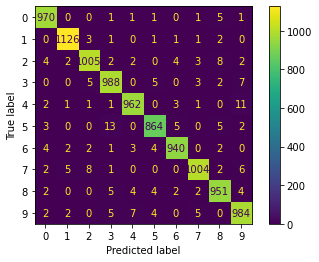

In [4]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



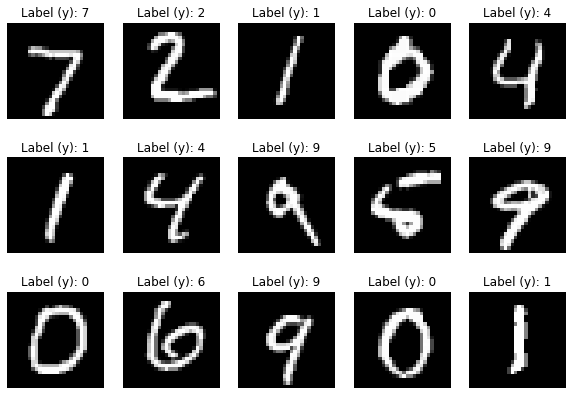

In [6]:
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_pred[i]))
    plt.axis('off')

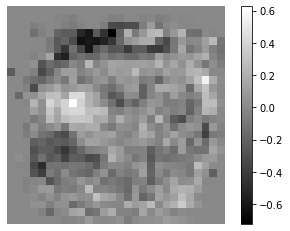

In [7]:
w = mlpc.coefs_
w = np.array(w[0])
w1 = np.array(w[:,0])
w_matrix = w1.reshape(28,28)
fig = plt.figure()
plt.imshow(w_matrix,cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()